# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импорт библиотек

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

Чтение файла

In [64]:
df = pd.read_csv('real_estate_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


### Вывод

В датасете более 20т строк, однако видно, что строки "склеены" и все в одной колонке. Поэтому сначала я добавлю sep, затем изучу дубликаты и пропуски и обработаю их

## Предобработка данных

In [65]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Теперь датасет в "читаемом" виде. Всего 22 колонки. Разные типы данных, к примеру в колонках этаж и всего этажей. Их нужно привести к одному. Десятые доли можно откинуть, для этажа подходят только целые числа. Также я бы изменила типы данных в тех столбцах, с которыми будут производиться математические операции.

Проверю на полные дубликаты

In [67]:
df.duplicated().sum()

0

Проверка на дубликаты показала, что их нет

In [68]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Методом .isna() нахожу пропуски в таблице. Во многих столбцах есть пропуски. Предположу, что при подаче объявления люди не заполняют все графы. Какие-то, вероятно, можно заполнить. Я заполню пропуски в столбце "балкон" 0, предполагаю, что если человек не поставил ничего, то значит балкона нет. Есть пропуски в столбце "всего этажей". Их 86 (это около 0,3% данных). В исследовании у меня есть задача найти взаимосвязть этажности и цены, и значения этого столбца нужны будут для определения последнего этажа. Поэтому здесть я заменю на среднее, полагаю 0,3 данных не повлияют существенно на исследование. Есть также очень много пропусков (почти 90%) в столбце "апартаменты". Думаю, люди почти никогда не заполняют эту графу всвязи с тем, что насколько мне известно на законодательном уровне не совсем ясно, что же все таки считать апартаментами. Однако с этими пропусками я ничего не буду делать, оставлю их, так как в исследовании нет задачи найти взаимосвязи с апартаментами.

Изменю тип данных и заполню пропуски

In [69]:
df['balcony'] = df['balcony'].fillna(0).astype(int)
df['last_price'] = df['last_price'].astype(int)
df['total_area'] = df['total_area'].astype(int)
df.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [70]:
df['floors_total'] = df['floors_total'].fillna(df['floor'] + 1)
df['floors_total'].isna().sum()

0

Пропуски в колонке балкона заполню значением из колонки этаж +1. Таким образом, значение из колонки этаж не попадет ни в категорию "последний" , ни в "первый" этаж, и не будет сильно искажать результаты исследования, ведь большинство квартир находится в категории "другой" (этаж)

In [71]:
df['ceiling_height'].value_counts()
df['ceiling_height'].describe()
df['ceiling_height'] = df.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))
#df[df['ceiling_height'].isna()]
#df['floors_total'].value_counts()

В колонке высота потолков пропусков 9195. Методом value_counts() изучу значения в этой колонке, и более внимательно посмотрю методом describe(). Основная часть значений находится в диапазоне от 2.5 до 3 м. Есть выбивающиеся значения, как то 27.5 или 100 метров. Их немного, но я, пожалуй, их "срежу", когда буду работать с аномальными значениями. Медианное значение - 2.65, а среднее - 2.77. На основе этой картины я принимаю решение заполнить пропуски средним значением, применив группировку по этажности дома. После заполнения пропуск всего один и я решила посмотреть на него - это объявление о квартире на 32 этаже, где всего 33. Полагаю, это заполненный ранее пропуск в колонке "всего этажей" и для него, возможно, нет среднего значения по этажу. Методом value_counts() я проверяю уникальные значения - действительно объявление с таким количеством этажей только одно. Оставляю этот пропуск.

Пропуски в колонках "площадь кухни" и "жилая" буду заполнять следующим образом:
- В колонке "студия" и "общая площадь" нет пропусков. Следовательно, пропуски в площади кухни в квартирах-студиях можно заполнить нулем (это 149 пропусков)
- Попробую расчитать площадь жилую как разницу общей и кухни
- Пропуски в столбце площадь кухни заполню медианным значением с группировкой по общей площади
Полагаю, медианное значение не заполнилось там, где его нет для этой группы, так как не из чего было его рассчитать (значения NaN). Я оставляю эти пропуски: 17 строк из 23 тыс не должны повлиять на результаты исследования

In [72]:
df.loc[df['studio'] == True, 'kitchen_area'] = df.loc[df['studio'] == True, 'kitchen_area'].fillna(0)

df_transformed = df.groupby('total_area')['kitchen_area'].transform('median')
df['kitchen_area'] = df['kitchen_area'].fillna(df_transformed)

df['living_area'] = df['living_area'].fillna(df['total_area'] - df['kitchen_area'])
df.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                12
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area               17
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [73]:
df['cityCenters_nearest'].describe()
df['cityCenters_nearest'] = df.groupby('locality_name')['cityCenters_nearest'].apply(lambda x: x.fillna(x.mean()))

df['cityCenters_nearest'].isna().sum()

5435

В колонке расстояние до центра 5519 пропусков. Изучаю значения в стобце методом describe(). Буду заполнять их значениями с группировкой по названию места (locality_name). Таким образом удалось заполнить лишь 84 пропуска из более чем 5 тыс. Не уверена насчет оставшихся - заполнить почти 1/4 данных средним или медианой, возможно, будет некорректно. 

In [74]:
df['floors_total'] = df['floors_total'].astype(int)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')
#df['days_exposition'] = df['days_exposition'].astype('float32').astype('int64')

В шаге Предобработка данных таблица была приведена в "читаемый" вид, была проверена на дубликаты и пропуски. Пропуски в столбцах всего этажей и балкон были заполнены. Также были заполнены пропуски в столбцах жилая площадь, площадь кухни, высота потолков. Уже известно, что со значениями столбцов цена, площадь я буду производить математические операции, поэтому во избежание ошибок привожу их к целочисленному типу. Стоимость за квадратный метр исчисляется в тысячах, порой сотней тысяч рублей, поэтому "копейками" можно пренебречь. Также перевожу в целочисленный тип данных знаяени столбца "всего этажей", а значения столбца "дата размещения" в удобный для обработки вид даты.

## Расчёты и добавление результатов в таблицу

Рассчитываю стоимость за квадратный метр и добавляю в таблицу

In [75]:
df['price_per_sqm'] = df['last_price']/df['total_area']
df.head(5)
#df['price_per_sqm'].value_counts()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm
0,20,13000000,108,2019-03-07,3,2.700000,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000,40,2018-12-04,1,2.782385,11,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750.000000
2,10,5196000,56,2015-08-20,2,2.793193,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000,159,2015-07-24,3,2.731545,14,144.0,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000,100,2018-06-19,2,3.030000,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Добавляю день недели, месяц и год публикации объявления

In [76]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year
0,20,13000000,108,2019-03-07,3,2.700000,16,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.782385,11,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,83750.000000,1,12,2018
2,10,5196000,56,2015-08-20,2,2.793193,5,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000,159,2015-07-24,3,2.731545,14,144.0,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000,100,2018-06-19,2,3.030000,14,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Функцией категоризирую этажность на первый, последний и другой

In [77]:
def floor_cat(row):
    fl = row['floor']
    fl_total = row['floors_total']
    if fl == 1:
        return 'первый'
    if fl == fl_total:            
        return 'последний'
    return 'другой'

row_values = [36, 36]
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns)
floor_cat(row)

df['floor_category'] = df.apply(floor_cat, axis=1)
df['floor_category'].value_counts()



другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

Находим соотношение жилой площади к общей, площади кухни к общей

In [78]:
df['ratio_living_to_total'] = df['living_area']/df['total_area']*100
#df.head()

In [79]:
df['ratio_kitchen_to_total'] = df['kitchen_area']/df['total_area']*100
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,floor_category,ratio_living_to_total,ratio_kitchen_to_total
0,20,13000000,108,2019-03-07,3,2.700000,16,51.0,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,47.222222,23.148148
1,7,3350000,40,2018-12-04,1,2.782385,11,18.6,1,NaN,...,0.0,NaN,81.0,83750.000000,1,12,2018,первый,46.500000,27.500000
2,10,5196000,56,2015-08-20,2,2.793193,5,34.3,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,61.250000,14.821429
3,0,64900000,159,2015-07-24,3,2.731545,14,144.0,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,90.566038,9.433962
4,2,10000000,100,2018-06-19,2,3.030000,14,32.0,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,32.000000,41.000000


Были рассчитаны и добавлены в таблицу цена за квадратный метр, отдельно день, месяц и год размещения объявления, категория этажа(первый, последний, другой), соотношение жилой площади к общей и кухни к общей.

## Исследовательский анализ данных

Построю гистограмму значений общей площади

<AxesSubplot:>

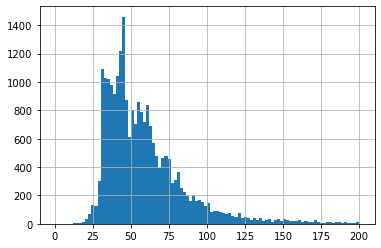

In [80]:
df['total_area'].hist(bins=100, range=(0,200))

In [81]:
df['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

Гистограмма значений площади выглядит нормально. Большинство квартир от 25 до 75 кв.м. Значительная часть от 75 до 100 кв.м. Квартиры большего метража встречаются, но значительно реже. describe показывает, что стандартное отклонение небольшое, медиана недалеко от среднего

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

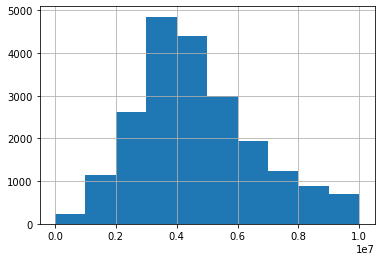

In [82]:
df['last_price'].hist(bins=10, range=(0,10000000))
df['last_price'].describe()

Гистограмма цены также показывает нормальное распределение.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

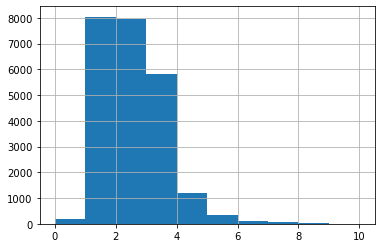

In [83]:
df['rooms'].hist(bins=10, range=(0,10))
df['rooms'].describe()

<AxesSubplot:>

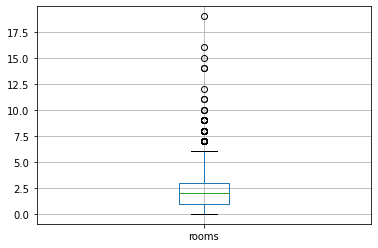

In [84]:
df['rooms'].value_counts()
df.boxplot('rooms')

Гистограмма столбца "комнаты" показывает, что больше всего квартир с 1-3 комнатами (и методом value_counts можно посмотреть статистику: однокомнатных 8047, двухкомнатных 7940, трехкомнатных 5814). А диаграмма размаха четко показывает выбросы - редкие, но все же встречающиеся значения квартир с количеством комнат больше 6

count    23698.000000
mean         2.772212
std          0.992609
min          1.000000
25%          2.599132
50%          2.711692
75%          2.793193
max        100.000000
Name: ceiling_height, dtype: float64

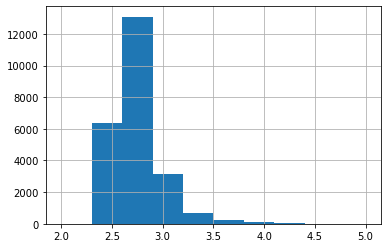

In [85]:
df['ceiling_height'].hist(range=(2,5))
df['ceiling_height'].describe()

Распределение высоты потолков: чаще всего от 2,3 до 3 м, что тоже выглядит логично. Есть квартиры с потолками и 3,5 и 4 метра, но их совсем мало. Стандартное отклонение небольшое, среднее и медиана отличаются на десятые доли. Еще на этапе предобработки выявились "странные" значения и также здесь можно увидеть (методом describe), что максимальное значение в столбце 100м, что выглядит неправдоподобно. Этих значений не много и я их уберу при дальнейшем исследовании.

<AxesSubplot:>

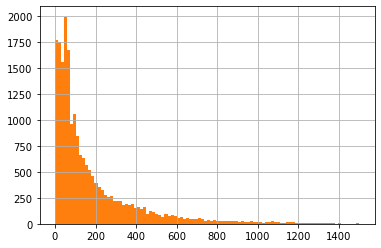

In [86]:
df['days_exposition'].hist(bins=100, range=(40,80)) 
df['days_exposition'].hist(bins=100, range=(0,1500))

В столбце количество дней объявления по всей видимости есть аномальные значения. Большая часть квартир продается в первые 200-300 дней. После значения 800 уже совсем не большое количество, однако есть и значения с 1500. Хоть их и мало, они могут существенно на показатели. Рассмотрим подробнее значения в столбце

In [87]:
#df = df.dropna(subset=['days_exposition'])
#df['days_exposition'] = df['days_exposition'].astype(int)
df['days_exposition'].describe()



count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как и ожидалось, в столбце по значениям медиана очень "далеко" от среднего. Стандартное отклонение высокое. Я принимаю решение удалить значения > 800 дней. Они редкие, однако влияют на показатели и могут в целом повлиять на исследование

In [88]:
df_new = df.query('days_exposition < 800' and 'ceiling_height < 5' and 'rooms < 6')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23504 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23504 non-null  int64         
 1   last_price              23504 non-null  int32         
 2   total_area              23504 non-null  int32         
 3   first_day_exposition    23504 non-null  datetime64[ns]
 4   rooms                   23504 non-null  int64         
 5   ceiling_height          23503 non-null  float64       
 6   floors_total            23504 non-null  int32         
 7   living_area             23492 non-null  float64       
 8   floor                   23504 non-null  int64         
 9   is_apartment            2764 non-null   object        
 10  studio                  23504 non-null  bool          
 11  open_plan               23504 non-null  bool          
 12  kitchen_area            23488 non-null  float6

При анализе были найдены аномальные значения, как например количество дней объявления 1500 или количетсво комнат 17, или высота потолков 100м. Таких значений было немного, однако они могут влиять на такие показатели как среднее и медиана, поэтому я делаю срез и отбрасываю аномальные значения. Методом info смотрю, насколько уменьшилась исходная таблица (0.8%). Срез считаю оправданным.

Посмотрю на корреляцию

In [89]:
df_new[['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'weekday', 'month', 'year']].corr()

,last_price,total_area,rooms,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.679039,0.352957,-0.242675,0.003808,-0.001732,-0.052955
total_area,0.679039,1.000000,0.734492,-0.228925,-0.000681,0.006746,-0.096748
rooms,0.352957,0.734492,1.000000,-0.162365,-0.001216,-0.000991,-0.061164
cityCenters_nearest,-0.242675,-0.228925,-0.162365,1.000000,0.006239,-0.011656,0.028576
weekday,0.003808,-0.000681,-0.001216,0.006239,1.000000,0.011606,-0.005006
month,-0.001732,0.006746,-0.000991,-0.011656,0.011606,1.000000,-0.270018
year,-0.052955,-0.096748,-0.061164,0.028576,-0.005006,-0.270018,1.000000


Методом .corr() посмотрим на значения корреляции между разными характеристиками. В большей степени цена зависит от площади квартиры (0.63), в меньшей степени (слабая корреляция) от количества комнат. И нулевая корреляция, то есть никакого влияния от дня недели, месяца и года размещения объявления. Однако корреляция лишь один способ посмотреть на взаимосвязь. Рассмотри подробнее

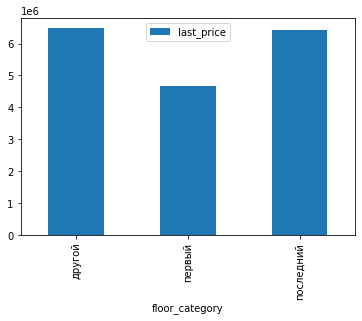

In [90]:
df_new.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(kind='bar')
plt.show()

Отдельно посмотрим на зависимость цены от этажа. Видно, что в среднем квартиры на первом этаже стоят дешевле, что выглядит правдоподобно

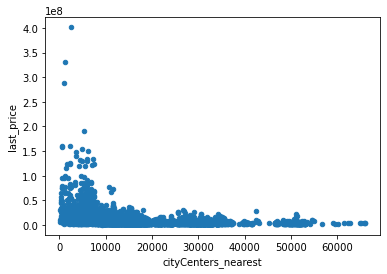

In [91]:
df_new.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
plt.show()

Основная масса дорогих квартир находится в центре. По мере удаления от центра снижается и стоимость.

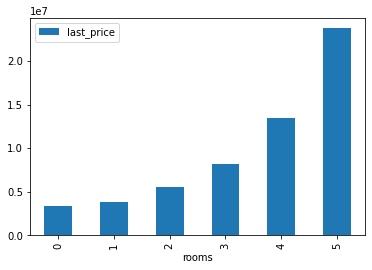

In [92]:
df_new.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(kind='bar')
plt.show()

Данная столбчатая диаграмма показывает, что чем больше комнат, чем стоимость квартиры больше. Также можно заключить, что квартиры-студии лишь немного ниже по стоимости однокомнатных квартир.

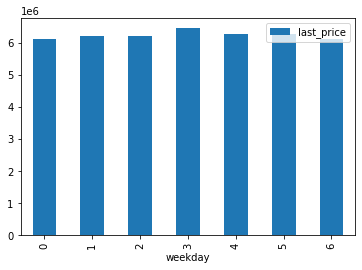

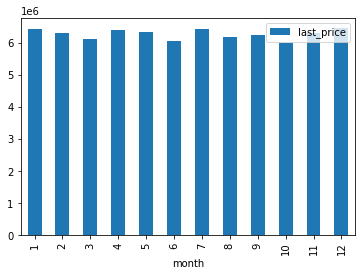

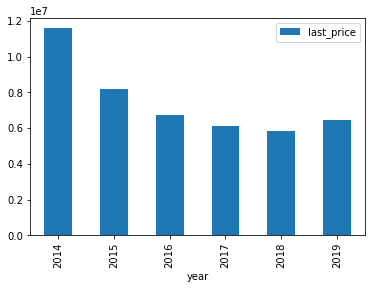

In [93]:
df_new.pivot_table(index='weekday', values='last_price', aggfunc='mean').plot(kind='bar')
df_new.pivot_table(index='month', values='last_price', aggfunc='mean').plot(kind='bar')
df_new.pivot_table(index='year', values='last_price', aggfunc='mean').plot(kind='bar')
plt.show()

Нельзя сказать, что есть какая-то определенная взаимосвязь между ценой и днем и месяцем размещения, однако все же квартиры с объявлениям по четвергам стоят дороже, а квартиры c объявлением, размещенным в марте и июне, стоят дешевле. По диаграмме по году можно точно сказать, что с 2014 по 2018 стоимость квартир снижалась, а в 2019 снова показала рост.

**Вывод по исследовательскому анализу**

Исходя из анализа можно сказать, что некоторые факторы в разной степени влияют на стоимость квартиры. Столбчатая диаграмма по этажности показала, что квартиры на первом этаже будут стоить дешевле, чем на последнем, а на последнем дешевле, чем на любом другом. Квартиры большей площади стоят дороже (чем больше площадь, тем больше стоимость квартиры). Основная масса дорогих квартир в центре. По мере удаления от центра стоимость квартир снижается. Стоимость квартир с объявлением в 2014 году была самая высокая  и далее по годам снижалась. Стоит заметить, что незначительно, но все же стоимость квартир с объявлением, размещенным в четверг, выше остальных. На основе графиков и анализа можно сделать вывод, что на стоимость квартир в большей степени влияет площадь, расположение относительно центра, количество комнат, этаж и год продажи.

## Проверка параметров

Для ответа на вопрос о средней стоимости в 10 самых упоминаемых населенных пунктах сначала найду эти 10 населенных пунктов, потом среднюю стоимость квадратного метра и объединю таблицы

In [94]:
top_ten = df_new.groupby('locality_name')['last_price'].count().sort_values(ascending=False).to_frame()
top_ten.head(10)

,last_price
locality_name,
Санкт-Петербург,15535
посёлок Мурино,522
посёлок Шушары,440
Всеволожск,398
Пушкин,366
Колпино,337
посёлок Парголово,326
Гатчина,307
деревня Кудрово,299


In [95]:
price_per_sqm_mean = df_new.pivot_table(index='locality_name', values='price_per_sqm', aggfunc='mean')
#price_per_sqm_mean.head()

In [96]:
top_ten_mean = top_ten.merge(round(price_per_sqm_mean,2), on='locality_name')
top_ten_mean.head(10)

,last_price,price_per_sqm
locality_name,,
Санкт-Петербург,15535,114906.92
посёлок Мурино,522,86379.97
посёлок Шушары,440,79068.60
Всеволожск,398,68985.24
Пушкин,366,103710.58
Колпино,337,75644.78
посёлок Парголово,326,90833.21
Гатчина,307,69045.52
деревня Кудрово,299,93002.17


Самым упоминаемым оказался Санкт-Петербург, как и самым дорогим по стоимости квадратного метра. Самый дешевый квадратный метр в Выборге. Можно предположить, что из-за удаленности от областного центра - Выборг находится дальше всех остальных населенных пунктов в таблице

В исследовании требуется ответить на вопрос о центральной зоне. Сначала я выделю квартиры в СПб, затем округлю расстояние в км до целого числа и построю график.

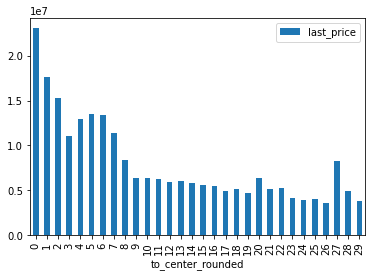

In [97]:

df_st_pet = df_new.query('locality_name == "Санкт-Петербург"')
df_st_pet = df_st_pet.dropna(subset=['cityCenters_nearest'])
df_st_pet['to_center_rounded'] = (df_st_pet['cityCenters_nearest']/1000).astype(int)

df_st_pet.pivot_table(index='to_center_rounded', values='last_price', aggfunc='mean').plot(kind='bar')
plt.show()


Методом .query() отсекаю часть датасета с квартирами в СПб. В столбце расстояние до центра были пропуски, поэтому перед округлением я ух удалила (их 25). К сводной таблице построила график столбчатую диаграмму. График показывает резкое изменение цены на 8-м километре. Таким образом, центральная зона с радиусом 8 км.

In [98]:
center_st_pet = df_st_pet.query('to_center_rounded < 8')
center_st_pet[['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest', 'weekday','month', 'year']].corr()

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.658641,0.307125,0.078315,-0.072971,0.031905,-0.025516,-0.060917
total_area,0.658641,1.000000,0.684654,0.124146,-0.116707,0.025232,-0.020833,-0.121361
rooms,0.307125,0.684654,1.000000,0.093622,-0.183730,-0.003599,-0.014443,-0.098569
ceiling_height,0.078315,0.124146,0.093622,1.000000,-0.159422,-0.008827,-0.014460,0.013904
cityCenters_nearest,-0.072971,-0.116707,-0.183730,-0.159422,1.000000,0.022648,-0.002954,0.034676
weekday,0.031905,0.025232,-0.003599,-0.008827,0.022648,1.000000,0.029444,0.000363
month,-0.025516,-0.020833,-0.014443,-0.014460,-0.002954,0.029444,1.000000,-0.242380
year,-0.060917,-0.121361,-0.098569,0.013904,0.034676,0.000363,-0.242380,1.000000


Значения корреляции по сегменту квартир в центре соответствуют ранее выведенным значениям в целом. На цену квартиры в большей степени влияет площадь, в меньше степени количетсво комнат, и близкая к нулю корреляция с высотой потолков. Построю диаграмму рассеяния для соотношения цена/площадь

Посмотрим подробнее взаимосвязи

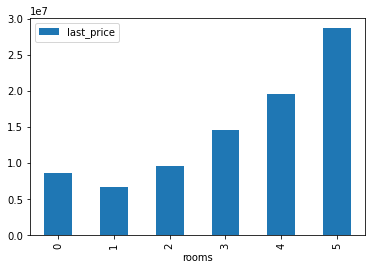

In [99]:
center_st_pet.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(kind='bar')
plt.show()

Для центра города также характерна более высокая стоимость квартир с большим количеством комнат. Примечательно, что здесь стоимость "квартиры с 0 комнат" выше стоимости однокомнатной квартиры. Я объяснила бы это наличием в центре большого количества квартир старого фонда, где есть коммунальные квартиры. Комнаты в подобных квартирах по площади (50-60 кв м) могут превосходить однокомнатные квартиры и соответственно стоить дороже не только из-за площади, а также из-за потенциальной возможности превратить такую комнату в отдельную квартиру.

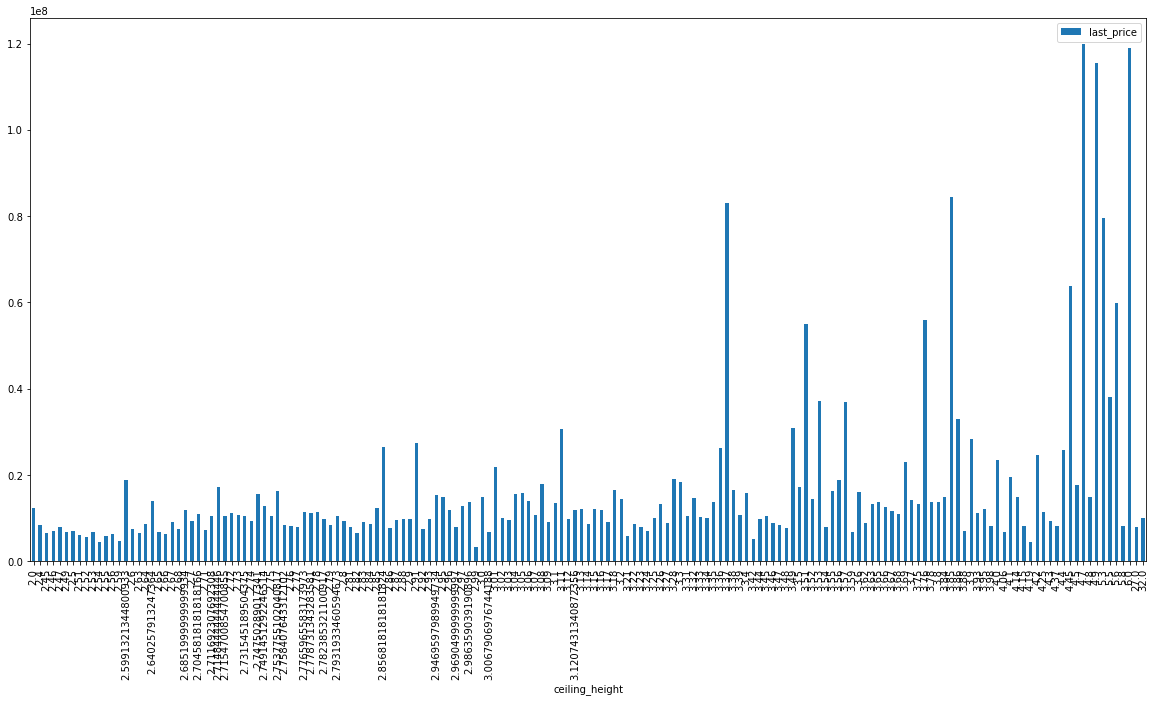

In [100]:
center_st_pet.pivot_table(index='ceiling_height', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(20,10))
plt.show()

Этот график показывает, что доля дорогих квартир больше среди тех, где высота потолков выше 3,4 м. Это не для всех квартир "работает", однако подобной стоимости квартир с высотой потолков 2.5-2.7 даже не встречается. Можно сделать вывод, что высота потолков влияет на стоимость квартир - квартиры с высокими потолками скорее будут дороже.

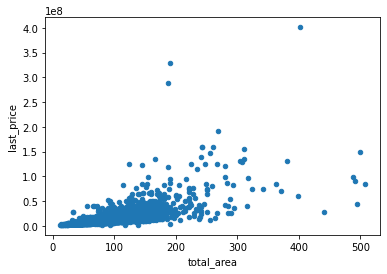

In [101]:
center_st_pet.plot(y='last_price', x='total_area', kind='scatter')
plt.show()

Видно, что график немного стремится вверх, при возрастании площади, растет и цена, однако следет отметить, что корреляция не сильная.

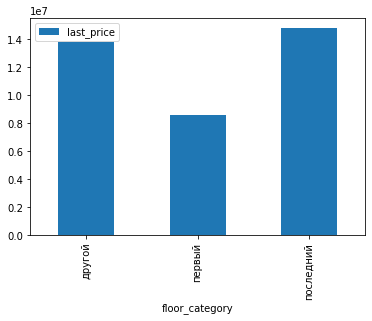

In [102]:
center_st_pet.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(kind='bar')
plt.show()

Также наблюдаем, что у квартир на первом этаже в центре будет стоимость ниже, чем у квартир на других этажах. 

Исследовательский анализ показал, что есть взаимосвязь между ценой и площадью квартиры. Корреляция 0,63. не сильная. В меньше степени стоимость квартиры зависит от числа комнат (показатель 0,3). Графики этажности показывают, что квартиры на первом этаже будут стоить дешевле, на последнем - дороже. В целом данные по центру города подтверждают выводы и для других расположений, например, квартиры на первом этаже везде стоят дешевле, а стоимость квартир с большей площадью в среднем везде дороже. Однако есть и некоторые особенности, к примеру, в центре немного выше стоимость "комнат"(студий). Есть предположение, что это из-за наличия старого жилищного фонда с коммунальными квартирами. 

## Общий вывод

В исследовании были проведены следующие этапы
- Изучение данных 
- Предобработка (проверка на дубликаты и пропуски, изменение типа данных)
- Расчет и добавление результатов в таблицу, как то этажность, стоимость за квадратеый метр
- Исследовательский анализ данных (сваодные таблицы, таблицы корреляции, графики:гистограммы, столбчатые диаграммы, диаграммы рассеяния)
Есть выводы промежуточные и на каждом шаге.
В результате исследования выяснилось, что цена в большей степени зависит от площади квартиры, средняя стоимость квартиры уменьшается по мере удаления от города. В Выборге самая дешевая средняя стоимость за квадратный метр, в СПб - самая дорогая. По стоимости квартир границы центра города находятся в радиусе 8 км. Исследования отдельно по квартирам в центре подтвердили предыдущие выводы о том, что на цену более всего влияет площадь, а квартиры на первом этаже стоят дешевле, чем квартиры на других этажах. Есть и другие факторы, которые влияют на стоимость квартир: это количество комнат (чем их больше, тем квартира дороже) и высота потолков (квартиры с высокими потолками дороже).
В исследовании встретились аномальные значения в некоторых столбцах. Все таки лучше выяснять точно, откуда такие значения берутся. Что-то может быть и ошибкой в сборе данных, а может и мошенническая деятельность. Мне показалось странным слишком долгая продолжительность продажи у некоторых квартир, может, есть какая-то схема, чтобы успеть продать одну квартиру не один раз. Я бы ограничила сроки размещения объявления одним годом - все таки большинство продается в первые 200 дней. Потом, возможно создать новое объявление.
